## Домашнее задание №2

#### Загрузка данных и первичный осмотр

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [125]:
data = pd.read_csv("S02-hw-dataset.csv")

In [126]:
# Первые 5 строк датасета
data.head(5)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [127]:
# Основная информация по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [128]:
# характеристики численных значений
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


#### Пропуски, дубликаты и базовый контроль качества

In [129]:
# Количество пропусков в столбце
# Видно, что в столбце age есть два пропущенных значения
data.isna().sum()

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

In [130]:
# Количество дупликатов
# В датасете есть одно дублирующее значения
data.duplicated().sum()


1

In [131]:
# Выведем дублирующее значение
data[data.duplicated()]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [132]:
data.describe()

#Посмотрим на все количественные значения

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [133]:
# Человек с максимальным возрастом
print('age max:', data['age'].max())
# Количество человек старше ста лет
print('age > 100:', data[data['age'] > 100].shape[0])
# Записи людей с возрастом больше 100 лет
data[data['age'] > 100]

age max: 120.0
age > 100: 1


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [134]:
# Возраст не целое число
data[data['age'] % 1 != 0]

,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
12,13,NaN,US,9,630


In [135]:
# Значения столбца country
data['country'].unique()
# Здесь всё в порядке

array(['FR', 'RU', 'DE', 'CN', 'US'], dtype=object)

In [136]:
# Проверим столбец purchases
data[data['purchases'] < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Проблемы:
- Существует запись с человеком возраста 120 лет
- Существуют две записи с пропущенным значеним возраста
- Существует запись с отрицательным значением покупок

#### Базовый EDA: группировки, агрегаты и частоты

In [137]:
# Посчитаем частоты для значения country
data['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [138]:
# Посморим средний доход в зависимости от страны
data.groupby('country')['revenue'].agg('mean')

country
CN    1054.000000
DE    1445.500000
FR     675.916667
RU     790.076923
US     557.375000
Name: revenue, dtype: float64

In [139]:
# Средний доход по возрасту
temp = data[(data['age'] < 100) & (data['age'] % 1 == 0)].copy()
temp['age_group'] = pd.cut(temp['age'], 4,
                           include_lowest=True)
age_int = temp.groupby('age_group')['revenue'].agg('mean')
age_int

C:\Users\jmere\AppData\Local\Temp\ipykernel_32504\689277992.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_int = temp.groupby('age_group')['revenue'].agg('mean')


age_group
(4.947, 18.0]    1296.000000
(18.0, 31.0]      563.200000
(31.0, 44.0]     1274.090909
(44.0, 57.0]      585.600000
Name: revenue, dtype: float64

Можно сделать выводы:
- Страны RU и FR доминируют в датасете, а CN почти не представлена
- Больше всего средний доход в DE и CN, но надо учесть, что эти слабо представленны в датасете
- Больше всего среднее вознаграждение у людей в диапазоне 32-44 года, надо дополнительно исследовать доход людей 5-18 лет

#### Визуализация данных в Matplotlib

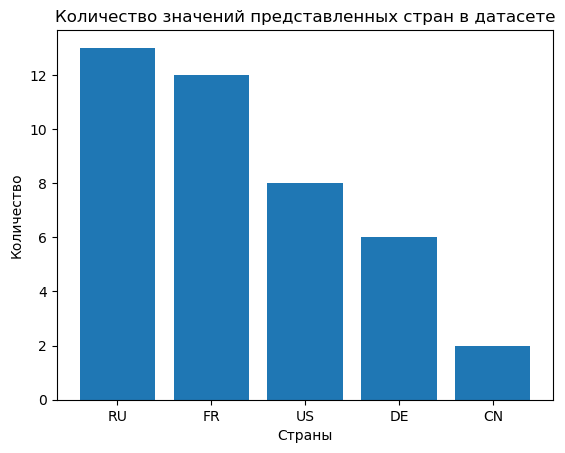

In [140]:
# Количество значений представленных стран в датасете
countries = data['country'].value_counts().index
mode = data['country'].value_counts().values
plt.bar(countries, mode)
plt.title("Количество значений представленных стран в датасете")
plt.xlabel("Страны")
plt.ylabel("Количество")
plt.show()

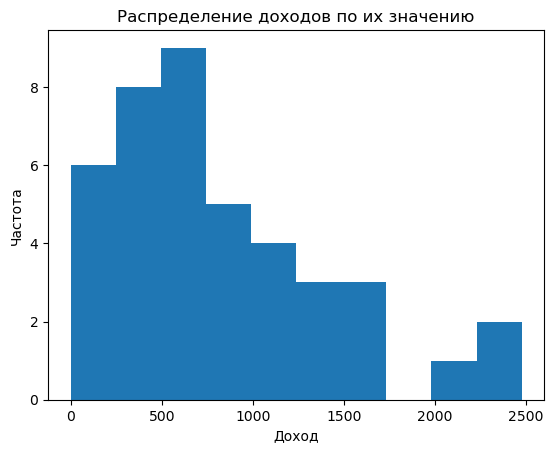

In [141]:
plt.hist(data['revenue'], bins=10)

plt.title("Распределение доходов по их значению")
plt.ylabel("Частота")
plt.xlabel("Доход")
plt.show()

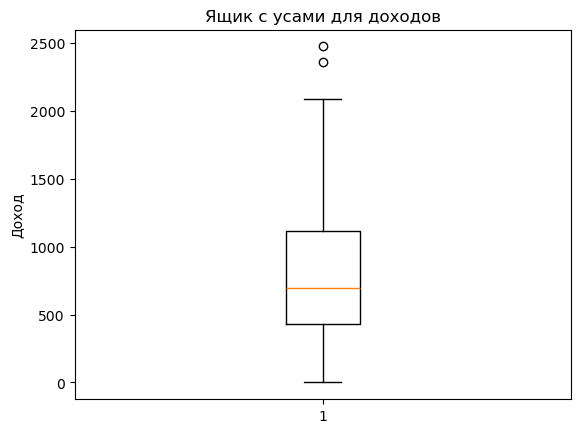

In [142]:
plt.boxplot(data['revenue'])
plt.title("Ящик с усами для доходов")
plt.ylabel("Доход")
plt.show()

Из графика boxplot и гистограммы можно обнаружить выбросы - записи с очень высоким доходом

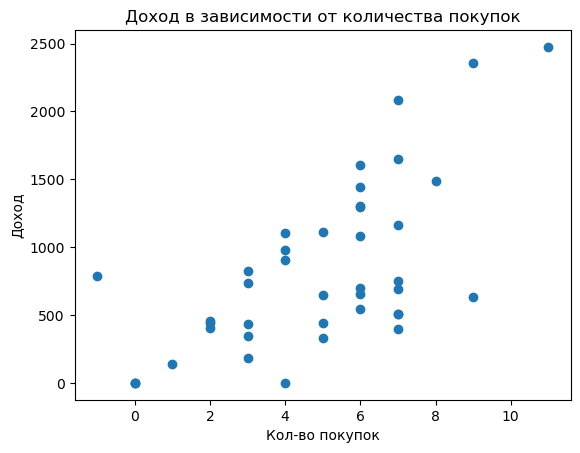

In [143]:
plt.scatter(data['purchases'], data['revenue'])
plt.title("Доход в зависимости от количества покупок")
plt.xlabel("Кол-во покупок")
plt.ylabel("Доход")
plt.savefig("./figures/dependence_of_revenue_on_purchases.png")
plt.show()


Видна зависимость между кол-во покупок и доходом